In [2]:
from llama_index.core.agent import ReActAgent
from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage
from llama_index.core.tools import BaseTool, FunctionTool
from llama_index.core.agent import FunctionCallingAgentWorker, AgentRunner
from llama_index.core.agent import AgentRunner

In [2]:
import os
os.environ['OPENAI_API_KEY'] = 'OPENSIAPIKEY'

In [23]:
%reload_ext autoreload
%autoreload 2

import nest_asyncio
nest_asyncio.apply()

In [25]:
!pip install arize-phoenix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB

In [27]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.6 MB/s eta 0:00:00


In [6]:
import phoenix as px
from phoenix.trace.langchain import LangChainInstrumentor

# start the phoenix app
session = px.launch_app()
# Initialize Langchain auto-instrumentation
LangChainInstrumentor().instrument()

🌍 To view the Phoenix app in your browser, visit https://9714snpxhtb3-496ff2e9c6d22116-6006-colab.googleusercontent.com/
📖 For more information on how to use Phoenix, check out https://docs.arize.com/phoenix


In [30]:
!pip install langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 2.9 MB/s eta 0:00:00


In [32]:
!pip install ragas

INFO: pip is looking at multiple versions of langchain to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-community to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-openai to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.0/397.0 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.8 MB/s eta 0

In [3]:
from langchain_openai import ChatOpenAI
from ragas.llms import LangchainLLMWrapper

llm = ChatOpenAI(model="gpt-4o",temperature=0)
judge_llm = LangchainLLMWrapper(llm)

In [4]:
def process_row(row, correct=False, column="response"):
    if correct:
        row[column] = row["correct"]
    else:
        row[column] = row["incorrect"]
    return row

In [ ]:
#failthfullness

In [7]:
row = {
    "user_input": "Where and when was Einstein born?",
    "retrieved_contexts": ["Albert Einstein (born 14 March 1879) was a German-born theoretical physicist, widely held to be one of the greatest and most influential scientists of all time"],
    "correct": "Einstein was born in Germany on 14th March 1879.",
    "incorrect": "Einstein was born in Germany on 20th March 1879.",
}

from ragas.metrics import faithfulness
faithfulness.llm = judge_llm

faithfulness.score(process_row(row, correct=True))

<ipython-input-7-8b683f2f6b95>:11: DeprecationWarning: The function score was deprecated in 0.2, and will be removed in the 0.3 release. Use single_turn_ascore instead.
  faithfulness.score(process_row(row, correct=True))


1.0

In [ ]:
#Answer Correctness

In [8]:
row = {
    "user_input": "Where and when was Einstein born?",
    "reference": "Einstein was born in 1879 in Germany.",
    "correct": "In 1879, Einstein was born in Germany.",
    "incorrect": "Einstein was born in Spain in 1879.",
}

from ragas.metrics import answer_correctness, answer_similarity
from ragas.embeddings import embedding_factory

answer_correctness.llm = judge_llm
answer_similarity.embeddings = embedding_factory("text-embedding-3-small")
answer_correctness.answer_similarity = answer_similarity

In [9]:
answer_correctness.score(process_row(row, correct=True))

<ipython-input-9-1d079f71d4dd>:1: DeprecationWarning: The function score was deprecated in 0.2, and will be removed in the 0.3 release. Use single_turn_ascore instead.
  answer_correctness.score(process_row(row, correct=True))


0.9837423709906448

In [ ]:
#context Recall

In [10]:
row = {
    "user_input": "Where and when was Einstein born?",
    "reference": "Einstein was born in 1879 in Germany.",
    "correct": ["Albert Einstein was born on March 14, 1879 in Ulm, Württemberg, Germany"],
    "incorrect": ["Einstein was born in Ulm, but his family moved to Munich when he was just six weeks old",
                  "Einstein's birth was registered at the registry office in Ulm on March 15, 1879, the day after he was born"
                  "At the time of Einstein's birth, Ulm was a growing town of about 33,000 inhabitants"],
}

from ragas.metrics import context_recall
context_recall.llm = judge_llm

context_recall._required_columns

{<MetricType.SINGLE_TURN: 'single_turn'>: {'reference',
  'retrieved_contexts',
  'user_input'}}

In [11]:
context_recall.score(process_row(row, correct=False, column="retrieved_contexts"))

<ipython-input-11-daa44c9015eb>:1: DeprecationWarning: The function score was deprecated in 0.2, and will be removed in the 0.3 release. Use single_turn_ascore instead.
  context_recall.score(process_row(row, correct=False, column="retrieved_contexts"))


0.0

In [12]:
#Context Enity Recall

In [13]:
from ragas.metrics import context_entity_recall
context_entity_recall.llm = judge_llm
context_entity_recall._required_columns
context_entity_recall.score(process_row(row, correct=False, column="retrieved_contexts"))

<ipython-input-13-08313d2c4300>:4: DeprecationWarning: The function score was deprecated in 0.2, and will be removed in the 0.3 release. Use single_turn_ascore instead.
  context_entity_recall.score(process_row(row, correct=False, column="retrieved_contexts"))


0.3333333322222222

In [14]:
#Context Precision

In [15]:
row = {
    "user_input": "Where and when was Einstein born?",
    "reference": "Einstein was born in 1879 in Germany.",
    "correct": ["Albert Einstein was born on March 14, 1879 in Ulm, Württemberg, Germany"],
    "incorrect": ["Einstein was born in Ulm, but his family moved to Munich when he was just six weeks old",
                  "Einstein's birth was registered at the registry office in Ulm on March 15, 1879, the day after he was born"],
}

from ragas.metrics import context_precision
context_precision.llm = judge_llm
context_precision._required_columns
context_precision.score(process_row(row, correct=True, column="retrieved_contexts"))

<ipython-input-15-5969e8f9c526>:12: DeprecationWarning: The function score was deprecated in 0.2, and will be removed in the 0.3 release. Use single_turn_ascore instead.
  context_precision.score(process_row(row, correct=True, column="retrieved_contexts"))


0.9999999999

In [16]:
#Rubric Based Metrics (Rank 1-5)

In [18]:
from ragas import evaluate
from datasets import Dataset, DatasetDict

#from ragas.metrics import labelled_rubrics_score, reference_free_rubrics_score
from ragas.metrics import rubrics_score_without_reference, rubrics_score_with_reference

responses = [
    "The Longest river is Ganga",
    "The Longest river is Nile",
    "The longest river in the world is the Nile, stretching approximately 6,650 kilometers (4,130 miles) through northeastern Africa, flowing through countries such as Uganda, Sudan, and Egypt before emptying into the Mediterranean Sea. There is some debate about this title, as recent studies suggest the Amazon River could be longer if its longest tributaries are included, potentially extending its length to about 7,000 kilometers (4,350 miles)."
]
rows = {
    "user_input": [
        "What's the longest river in the world?",
    ],
    "reference": [
        "The Nile is a major north-flowing river in northeastern Africa.",
    ],
    "response": [
        responses[2],
    ],
    "retrieved_contexts": [
        [
            "Scientists debate whether the Amazon or the Nile is the longest river in the world. Traditionally, the Nile is considered longer, but recent information suggests that the Amazon may be longer.",
            "The Nile River was central to the Ancient Egyptians' rise to wealth and power. Since rainfall is almost non-existent in Egypt, the Nile River and its yearly floodwaters offered the people a fertile oasis for rich agriculture.",
            "The world's longest rivers are defined as the longest natural streams whose water flows within a channel, or streambed, with defined banks.",
            "The Amazon River could be considered longer if its longest tributaries are included, potentially extending its length to about 7,000 kilometers."
        ],
    ]
}



dataset = Dataset.from_dict(rows)

result = evaluate(
    dataset,
    metrics=[
        rubrics_score_without_reference,
        rubrics_score_with_reference
    ],
)

result.to_pandas()

Evaluating:   0%|          | 0/2 [00:00<?, ?it/s]

question  \
0  What's the longest river in the world?   

                                            contexts  \
0  [Scientists debate whether the Amazon or the N...   

                                              answer  \
0  The longest river in the world is the Nile, st...   

                                        ground_truth  \
0  The Nile is a major north-flowing river in nor...   

   rubrics_score_without_reference  rubrics_score_with_reference  
0                                4                             5

In [19]:
#below is from phoenix trace for each LLM call and token and latency details

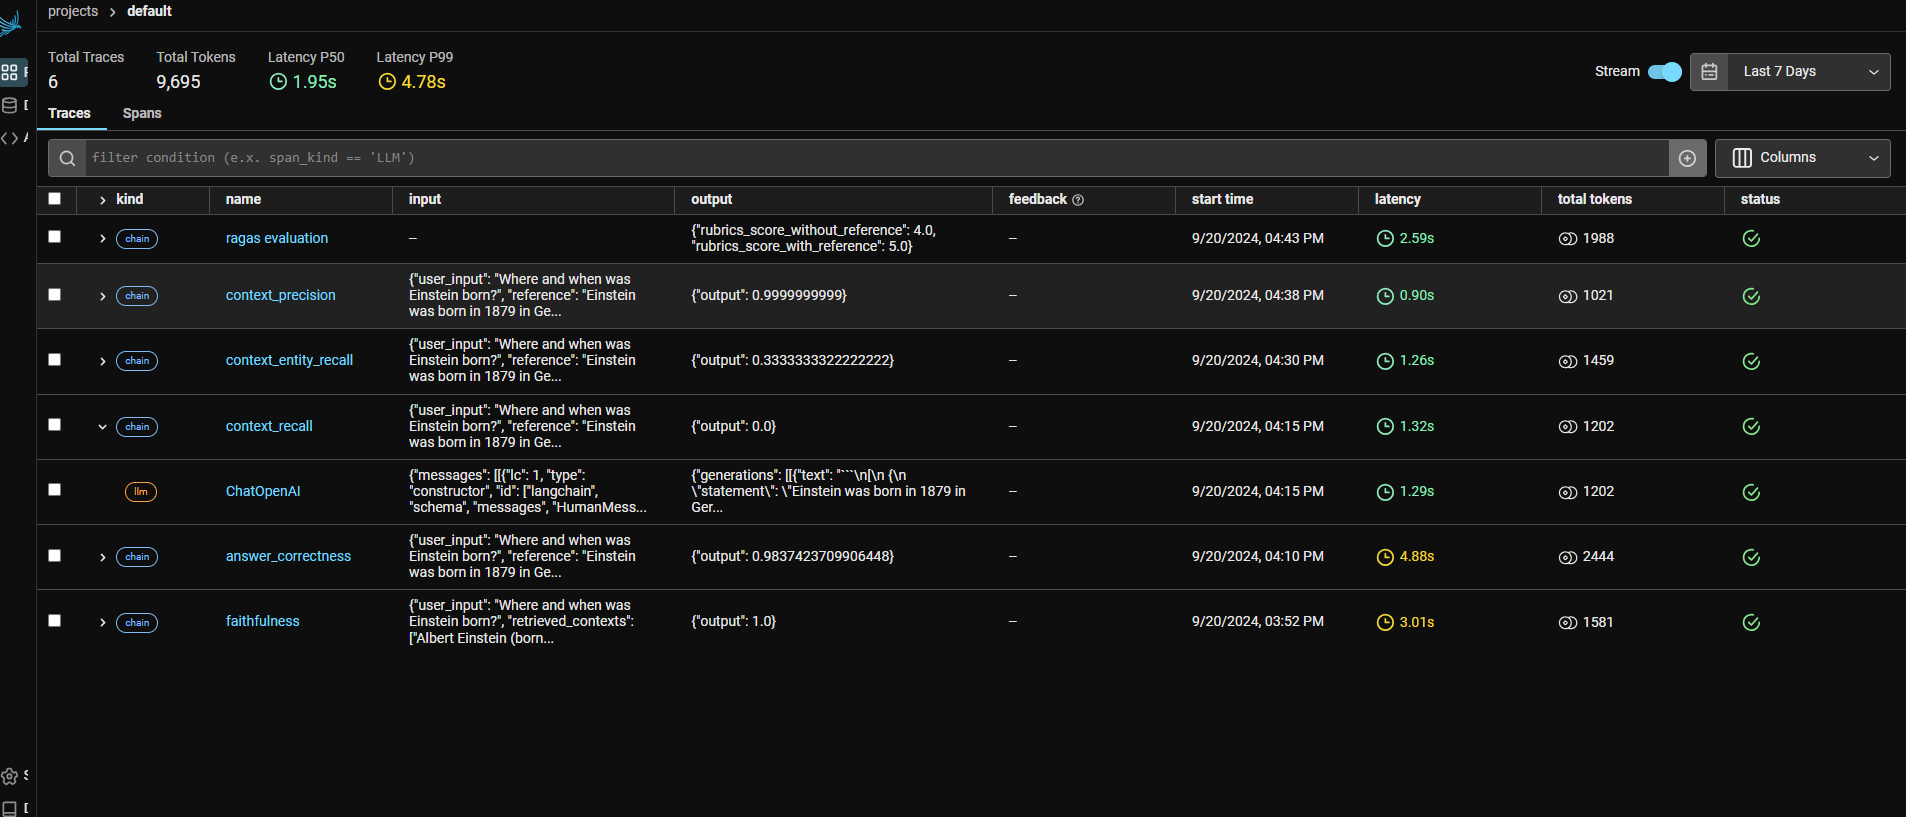